## Import

### Import Functions

In [31]:
from __future__ import division
from __future__ import print_function

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import random

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from skimage.measure import block_reduce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import compute_class_weight



import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model
from keras import optimizers
from keras import callbacks
from keras import backend as K

import tensorflow as tf

import time
import datetime
import os

filename_low_64 = "PS2-a-lowT"
filename_high_64 = "PS2-a-highT"

filename_low_32 = "PS2-d-lowT"
filename_high_32 = "PS2-d-highT"

# from google.colab import drive
# drive.mount('/content/drive')

### Import  64x64 Data

In [2]:
#Import the relevent images into python
high_t_64 = []
for i in range(500):
    high_t_64.append(np.loadtxt((filename_high_64+'/PS2-a-highT/')+str(i).zfill(3), delimiter=','))

In [3]:
#Import the relevent images into python
low_t_64 = []
for i in range(500):
    low_t_64.append(np.loadtxt((filename_low_64+'/PS2-a-lowT/')+str(i).zfill(3), delimiter=','))

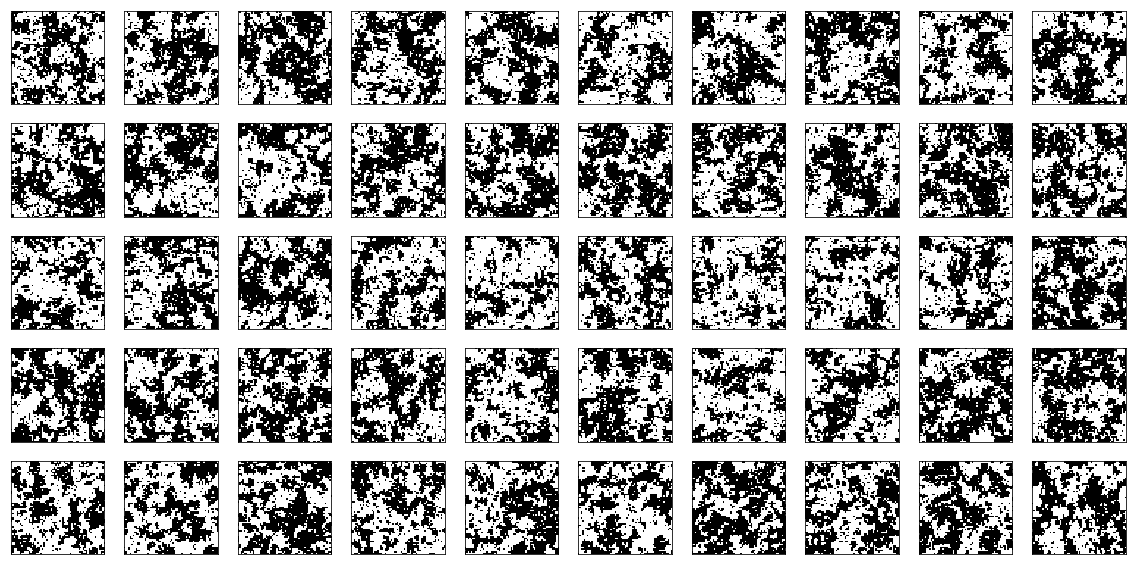

In [4]:
#Plot an array of some of the images, to try and better see what is going on.
fig,ax = plt.subplots(5,10,figsize=(20,10))
for i in range(50):
    ax[i//10,i%10].matshow(high_t_64[i],cmap=plt.cm.binary)
    ax[i//10,i%10].set_xticks(())
    ax[i//10,i%10].set_yticks(())

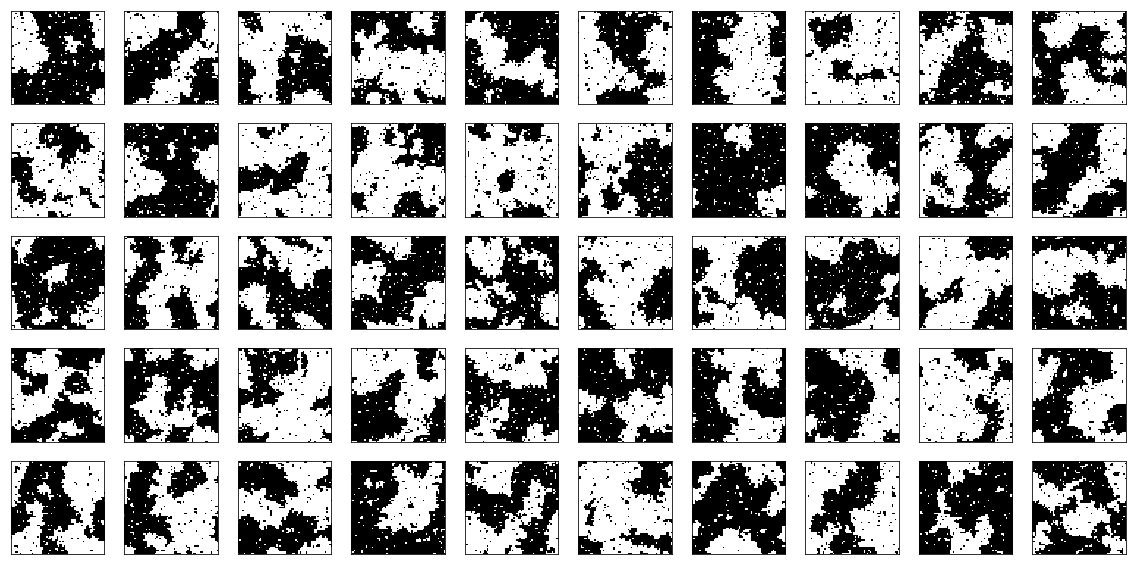

In [5]:
#Plot an array of some of the images, to try and better see what is going on.
fig,ax = plt.subplots(5,10,figsize=(20,10))
for i in range(50):
    ax[i//10,i%10].matshow(low_t_64[i],cmap=plt.cm.binary)
    ax[i//10,i%10].set_xticks(())
    ax[i//10,i%10].set_yticks(())

In [6]:
#Combine the two data-sets into a single array
data_img_64 = np.concatenate((high_t_64,low_t_64))

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
data_img_64 = data_img_64.reshape((-1, 64*64))

#Provide a set of labels which match the images (1 for high, and 0 for low)
data_label_64 = np.concatenate((np.ones(len(high_t_64)), np.zeros(len(low_t_64))))

#Randomize the data and labels in the same manner, so that I can easily create train and test sets
data_img_64, data_label_64 = shuffle(data_img_64, data_label_64, random_state = 0)

### Import 32x32 Data

In [7]:
#Import the high images into python
high_t_32 = []
for i in range(500):
    high_t_32.append(np.loadtxt((filename_high_32+'/PS2-d-highT/')+str(i).zfill(3), delimiter=','))

In [8]:
#Import the relevent images into python
low_t_32 = []
for i in range(500):
    low_t_32.append(np.loadtxt((filename_low_32+'/PS2-d-lowT/')+str(i).zfill(3), delimiter=','))

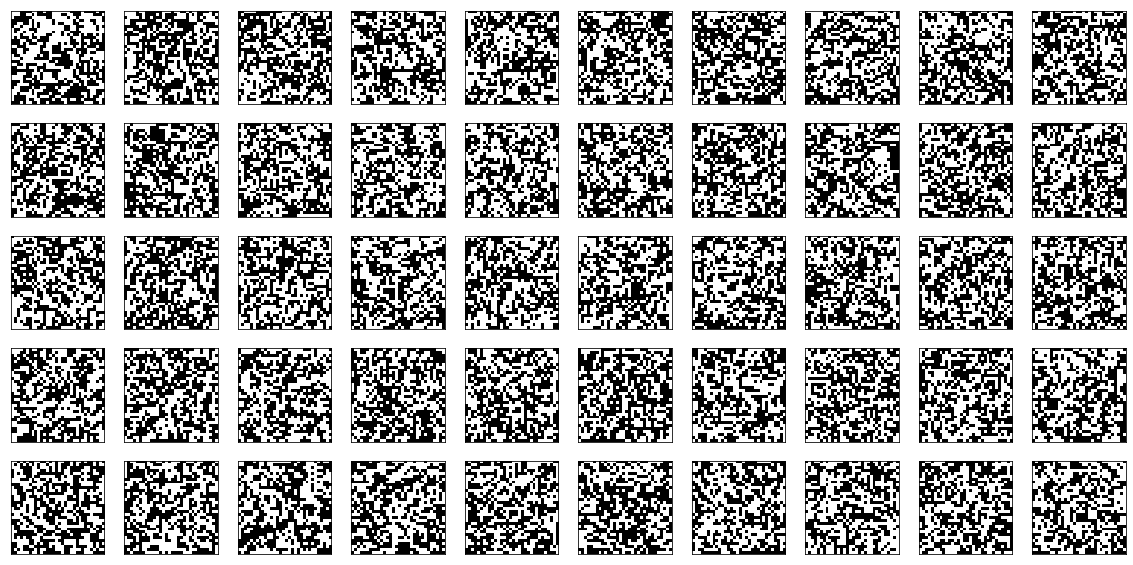

In [9]:
#Plot an array of some of the images, to try and better see what is going on.
fig,ax = plt.subplots(5,10,figsize=(20,10))
for i in range(50):
    ax[i//10,i%10].matshow(high_t_32[i],cmap=plt.cm.binary)
    ax[i//10,i%10].set_xticks(())
    ax[i//10,i%10].set_yticks(())

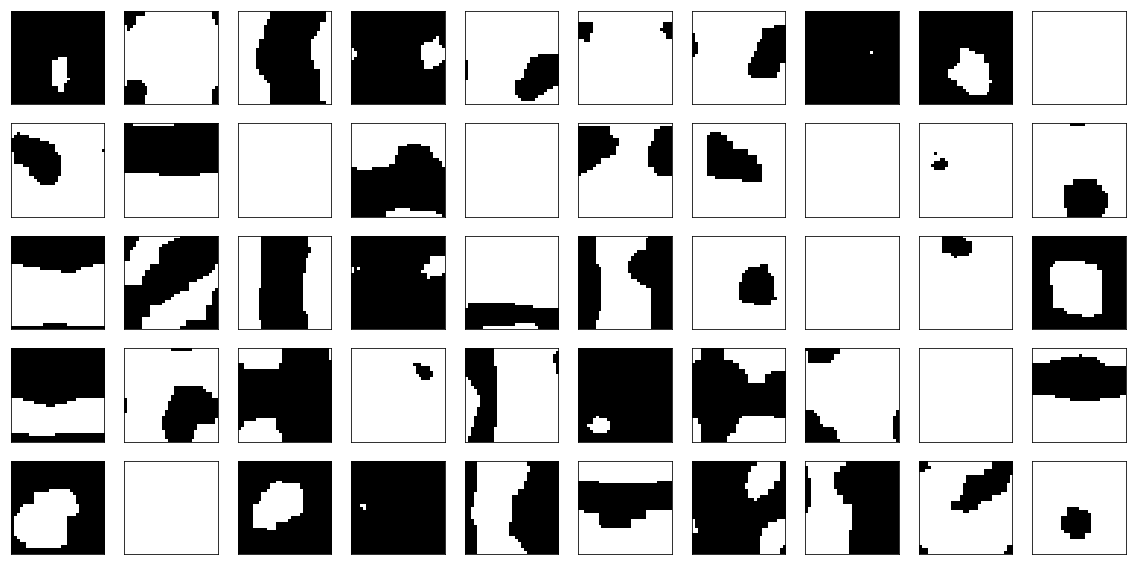

In [10]:
#Plot an array of some of the images, to try and better see what is going on.
fig,ax = plt.subplots(5,10,figsize=(20,10))
for i in range(50):
    ax[i//10,i%10].matshow(low_t_32[i],cmap=plt.cm.binary)
    ax[i//10,i%10].set_xticks(())
    ax[i//10,i%10].set_yticks(())

In [11]:
#Combine the two data-sets into a single array
data_img_32 = np.concatenate((high_t_32,low_t_32))

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
data_img_32 = data_img_32.reshape((-1, 32*32))

#Provide a set of labels which match the images (1 for high, and 0 for low)
data_label_32 = np.concatenate((np.ones(len(high_t_32)), np.zeros(len(low_t_32))))

#Randomize the data and labels in the same manner, so that we can easily create train and test sets
data_img_32, data_label_32 = shuffle(data_img_32, data_label_32, random_state = 0)

## Part a: Train a SVM (64x64)

### Determine Best Fitting Parameters

**[Introduction](https://scikit-learn.org/stable/tutorial/basic/tutorial.html#introduction)**

In the case of the Ising dataset, the task is to predict, given an image, which phase it is in. We are given samples of the two phases on which we fit an estimator to be able to predict the classes to which unseen samples belong.

In scikit-learn, an estimator for classification is a Python object that implements the methods `fit(X, y)` and `predict(T)`.

An example of an estimator is the class `sklearn.svm.SVC`, which implements support vector classification. The estimator’s constructor takes as arguments the model’s parameters.

For example : `classifier = svm.SVC(C=1e1,kernel='rbf',gamma=0.003,cache_size=8000,probability=False)` has three important pieces of information: the values for *C*, the *kernel*, and *gamma*.

---



**[Choosing the parameters of the model](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)**

To find good values for these parameters, we can use tools such as grid search and cross validation.

Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include `C`, `kernel` and `gamma` for Support Vector Classifier, `alpha` for Lasso, etc.

A search consists of:

* an estimator (regressor or classifier such as sklearn.svm.SVC());
* a parameter space;
* a method for searching or sampling candidates;
* a cross-validation scheme; and
* a score function.

Two generic approaches to sampling search candidates are provided in scikit-learn: for given values, `GridSearchCV` exhaustively considers all parameter combinations, while `RandomizedSearchCV` can sample a given number of candidates from a parameter space with a specified distribution.

For the purpose of this code, we encourage you to use the `GridSearchCV` functions.  You should run the training using a combination of given parameters, and then take the best combination.

In [12]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py
#PERFORM A GRID SEARCH HERE

### Train and Test Model

In [13]:
#TRAIN YOUR FINAL MODEL USING PARAMETERS FROM GRID SEARCH HERE

## Part a: Train a NN (64x64)

**[Introduction](https://towardsdatascience.com/what-are-hyperparameters-and-how-to-tune-the-hyperparameters-in-a-deep-neural-network-d0604917584a)**

Neural networks work far better than other existing methods for classification.  However, determining the right pair of hyperparameters for a neural network can be incredibly difficult.  For the purposes of this homework, try playing around with the following hyperparameters:

* the activation functions used in your hidden layers
* the dropout rate used in your hidden layers
* the number of nodes in your hidden layers

In [14]:
# Prepare our data to be inputted into a network
n_train = 750
batch_size = 128
num_classes = 2
epochs = 3

img_rows, img_cols = 64, 64

t = time.time()

x_train = data_img_64[:n_train]
y_train = data_label_64[:n_train]

x_test = data_img_64[n_train:]
y_test = data_label_64[n_train:]

# Keras requires inputted data to be in a specific shape.
# This if-statement puts it in the correct format for us.
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Because our data is already between 0 and 1, we have no need to rescale it
#(As we would for a color or greyscale image)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (750, 64, 64, 1)
750 train samples
250 test samples


In [37]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense

## Using a smaller version of the well known CNN architecture VGG
class SmallVGGNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1

		# if we are using "channels first", update the input shape
		# and channels dimension
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
			chanDim = 1

		# CONV => RELU => POOL layer set
		model.add(Conv2D(32, (3, 3), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.5))

		# (CONV => RELU) * 2 => POOL layer set
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.5))

		# (CONV => RELU) * 3 => POOL layer set
		model.add(Conv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.5))

		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(512))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))

		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("sigmoid"))

		# return the constructed network architecture
		return model

In [58]:
## Train the model

lb = LabelBinarizer()
train_labels = lb.fit_transform(y_train)
test_labels = lb.transform(y_test)

model = SmallVGGNet.build(width=64, height=64, depth=1,
	classes=len(lb.classes_))

MODEL_PATH = str(os.getcwd())+"/best_model.model"
INIT_LR = 0.0001 # learning rate
EPOCHS = 5 # number of epochs
BS = 64 # batch size
OPT = optimizers.SGD(lr=INIT_LR, decay=1e-6, momentum=0.9, nesterov=True) # optimizing function

print("Training...")
# Initialize model
model.compile(loss="binary_crossentropy", optimizer=OPT, 
	metrics=["accuracy"])

# Monitor the progress of the CNN accuracy and save the most accurate model
# to BEST_MODEL_PATH
saveBestModel = callbacks.ModelCheckpoint(MODEL_PATH, monitor='val_accuracy', verbose=1, save_best_only=True,
	save_weights_only=False, mode='auto')

# Train the model
H = model.fit(x_train, y_train, validation_data=(x_test, y_test),
    epochs=EPOCHS, batch_size=32, callbacks=[saveBestModel])

Training...
Train on 750 samples, validate on 250 samples
Epoch 1/5
750/750 [==============================] - 13s 17ms/step - loss: 1.0872 - accuracy: 0.4987 - val_loss: 0.7150 - val_accuracy: 0.5080

Epoch 00001: val_accuracy improved from -inf to 0.50800, saving model to /home/zack/Documents/AM216/HW2/best_model.model
Epoch 2/5
750/750 [==============================] - 12s 16ms/step - loss: 0.8558 - accuracy: 0.5760 - val_loss: 0.6978 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50800
Epoch 3/5
750/750 [==============================] - 12s 17ms/step - loss: 0.6414 - accuracy: 0.6827 - val_loss: 0.7923 - val_accuracy: 0.4920

Epoch 00003: val_accuracy did not improve from 0.50800
Epoch 4/5
750/750 [==============================] - 12s 17ms/step - loss: 0.4287 - accuracy: 0.8060 - val_loss: 1.1546 - val_accuracy: 0.4920

Epoch 00004: val_accuracy did not improve from 0.50800
Epoch 5/5
750/750 [==============================] - 13s 17ms/step - loss: 0.332

Evaluating network...
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.51      1.00      0.67       127

    accuracy                           0.51       250
   macro avg       0.25      0.50      0.34       250
weighted avg       0.26      0.51      0.34       250



/home/zack/anaconda3/envs/am216/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


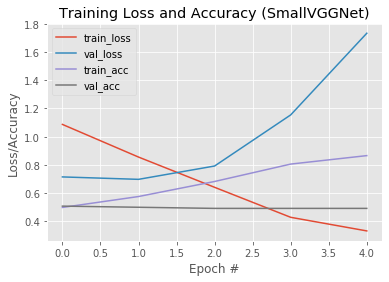

In [59]:
# Test the model and print summary of results
print("Evaluating network...")

model = load_model(MODEL_PATH)
predictions = model.predict(x_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1),
	predictions.argmax(axis=1), target_names=["0","1"]))

# Plot the training loss and accuracy. This code is adapted from Adrian Rosebrock
# and prints a standard graph to show the development of the model
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (SmallVGGNet)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## Part a: Train a NN (64x64)

## Part b: Explain why Logistic Regression does not work, (but also introduce a simple transform of the data that gives it 100% accuracy)

Ok we saw in section that logistic regression has really bad performance on this data. However, let's see if we can't transform the data to be more easily classified in the first place. The first thing that comes to mind is to look at some form of local variance for the image rather than the raw images themselves. Taking a look at this below...

In [19]:
def loc_var(img):
    loc_var_img = block_reduce(img, block_size=(4,4), func=np.var)
    return loc_var_img

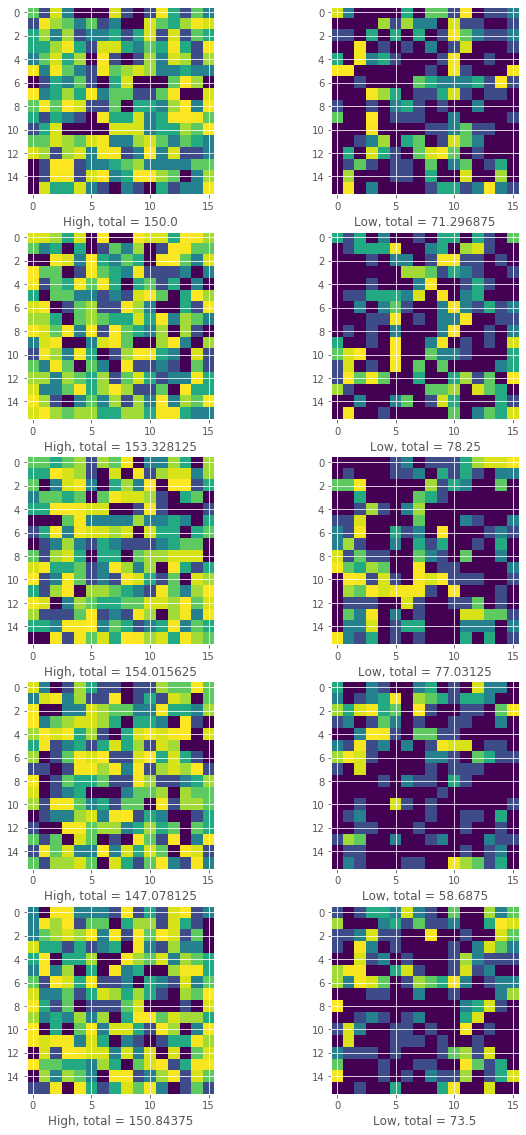

In [20]:
## MY SOLUTION ##
# Visualize the local variance of the data
n_sample = 5
high_rand_vec = random.sample(range(0,len(high_t_64)),n_sample)
low_rand_vec = random.sample(range(0,len(low_t_64)),n_sample)
high_64_img_var_sample = [loc_var(high_t_64[i]) for i in high_rand_vec]
low_64_img_var_sample = [loc_var(low_t_64[i]) for i in low_rand_vec]

fig,ax = plt.subplots(n_sample, 2,figsize=(10,4*n_sample))
for i in range(n_sample):
    ax[i,0].imshow(high_64_img_var_sample[i])
    ax[i,0].set_xlabel("High, total = " + str(np.sum(high_64_img_var_sample[i])))
    ax[i,1].imshow(low_64_img_var_sample[i])
    ax[i,1].set_xlabel("Low, total = " + str(np.sum(low_64_img_var_sample[i])))

Ok so just by looking at it we can tell that this should be easy to classify. In fact, I bet we could get 100% accuracy using a simple logistic regression model on the total local variance. Let's do that real quick below.

In [21]:
ht64_tot_loc_var_list = []
lt64_tot_loc_var_list = []

# Calculate the total local variance for all images
for img in high_t_64:
    ht64_tot_loc_var_list.append(np.sum(loc_var(img)))
for img in low_t_64:
    lt64_tot_loc_var_list.append(np.sum(loc_var(img)))

# Create train/test splits
mix64_tot_loc_var_list = np.concatenate((ht64_tot_loc_var_list, lt64_tot_loc_var_list)).reshape(-1,1)
mix64_lbl = np.concatenate((np.ones(len(ht64_tot_loc_var_list)), np.zeros(len(lt64_tot_loc_var_list))))

log_64_train_img, log_64_test_img, log_64_train_lbl, log_64_test_lbl = train_test_split(
    mix64_tot_loc_var_list, mix64_lbl, test_size=1/5.0, random_state=0)

In [22]:
log_reg = LogisticRegression(solver = 'lbfgs',max_iter=1000)
log_reg.fit(log_64_train_img, log_64_train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
score = log_reg.score(log_64_test_img, log_64_test_lbl)
print("Accuracy Score: " + str(score))

Accuracy Score: 1.0


So by transforming the data before analyzing it, we were able to get 100% accuracy without using anything fancier than out of the box logistic regression. __The reason logisctic regression does not work well on the raw data is because it is not stereotyped enough, and the points occupy some $64^2$-dimensional space in not easily identitiable clusters. The structure to the two classes is hidden one layer of abstraction beyond what logistic regression is able to reach.__

## Part c: Find $T_c$

### Ising Functions

In [24]:
# Simulating the Ising model
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

class Ising():
    ''' Simulating the Ising model '''  
    def __init__(self, size, temp):
        self.temp = temp
        self.N = int(size)
    ## monte carlo moves
    def mcmove(self, config, N, beta):
        ''' This is to execute the monte carlo moves using 
        Metropolis algorithm such that detailed
        balance condition is satisified'''
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N) # select a row
                    b = np.random.randint(0, N) # select a column
                    s =  config[a, b] # current state at (a, b)
                    # periodic boundary condition imposed
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    cost = 2*s*nb
                    if cost < 0:
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    config[a, b] = s
        return config
    
    def simulate(self):   
        ''' This module simulates the Ising model'''
        config = 2*np.random.randint(2, size=(self.N,self.N))-1   
        times = 100
        for i in range(times):
            self.mcmove(config, self.N, 1.0/self.temp)
        return config

In [25]:
## Simulate ising models at a range of tempuratures, save the results so we only have to do this once...
"""
temps_vec = np.linspace(0.01,15,num=1000)

sim_data = []
sim_data_temp = []
sim_data_tot_lv = []
for temp in temps_vec:    
    ising_simu = Ising(32, temp)
    img = ising_simu.simulate()
    
    sim_data.append(img)
    sim_data_temp.append(img)
    sim_data_tot_lv.append(np.sum(loc_var(img)))
    
cwd = str(os.getcwd())
sim_data_path = cwd+"/sim_data.npy"
sim_data_temp_path = cwd+"/sim_data_temp.npy"
sim_data_tot_lv_path = cwd+"/sim_data_tot_lv.npy"
np.save(sim_data_path, np.asarray(sim_data))
np.save(sim_data_temp_path, np.asarray(sim_data_temp))
np.save(sim_data_tot_lv_path, np.asarray(sim_data_tot_lv))
"""

'\ntemps_vec = np.linspace(0.01,15,num=1000)\n\nsim_data = []\nsim_data_temp = []\nsim_data_tot_lv = []\nfor temp in temps_vec:    \n    ising_simu = Ising(32, temp)\n    img = ising_simu.simulate()\n    \n    sim_data.append(img)\n    sim_data_temp.append(img)\n    sim_data_tot_lv.append(np.sum(loc_var(img)))\n    \ncwd = str(os.getcwd())\nsim_data_path = cwd+"/sim_data.npy"\nsim_data_temp_path = cwd+"/sim_data_temp.npy"\nsim_data_tot_lv_path = cwd+"/sim_data_tot_lv.npy"\nnp.save(sim_data_path, np.asarray(sim_data))\nnp.save(sim_data_temp_path, np.asarray(sim_data_temp))\nnp.save(sim_data_tot_lv_path, np.asarray(sim_data_tot_lv))\n'

In [26]:
sim_data = np.load(sim_data_path)
sim_data_temp = np.load(sim_data_temp_path)
sim_data_tot_lv = np.load(sim_data_tot_lv_path)

NameError: name 'sim_data_path' is not defined

In [ ]:
plt.scatter(temps_vec, sim_data_tot_lv)
plt.title("Simulated Ising models")
plt.xlabel("Tempurature")
plt.ylabel("Total Local Variance")
plt.show()

## Part d: Find $T_1$ and $T_2$